**Recommender System**

This is a recommender system using collaborating method. I used Matrix Factorisation algorithm to build the recommender. The dataset used is a real world rating matrix provided by Dabolinux Technology Company.

First we start by downloading the dataset:

In [1]:
pip install lightfm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808331 sha256=eebc7ef677151b312d170677c9472d92f49ad7fbc3522c5b3f53aa0338635eab
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [2]:
import pandas as pd

In [3]:
import numpy as np

columns = [I for I in range(1, 5826)]

In [4]:
df = pd.read_excel('rtmatric.xlsx', names=columns)

In [5]:
df = pd.DataFrame(df, index = [I for I in range(0, 338)])
df.index.name = 'user_id'
df.columns.name = 'item_id'
pd.options.display.max_rows = 10
df

item_id,1,2,3,4,5,6,7,8,9,10,...,5816,5817,5818,5819,5820,5821,5822,5823,5824,5825
user_id,,,,,,,,,,,,,,,,,,,,,
0,2.130,0.262,0.273,0.251,0.254,0.427,0.652,0.642,0.439,0.720,...,-1,0.499,0.164,0.457,0.280,0.270,0.287,2.308,0.254,0.263
1,0.854,0.366,0.376,0.357,0.358,0.115,0.649,0.980,0.642,1.213,...,-1,0.814,0.516,0.786,0.610,-1.000,-1.000,10.455,-1.000,-1.000
2,0.693,0.226,0.233,0.220,0.219,0.344,0.765,0.793,0.371,0.552,...,-1,0.376,0.255,0.621,0.177,0.167,0.142,0.217,0.170,0.173
3,0.866,0.227,0.233,0.220,0.221,0.366,0.836,0.863,0.372,0.619,...,-1,0.413,0.150,0.173,0.091,0.568,0.092,0.164,0.090,0.095
4,1.833,0.251,0.257,0.261,0.239,0.254,0.896,0.920,0.421,0.860,...,-1,0.390,0.195,0.476,0.296,0.340,0.251,1.059,0.412,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,4.425,0.234,0.242,0.225,0.227,0.368,0.806,0.817,0.389,0.586,...,-1,0.320,0.107,0.085,0.092,0.077,0.076,0.086,0.076,0.077
334,0.811,0.247,0.258,0.235,0.236,0.415,0.533,0.820,0.399,0.584,...,-1,0.349,-1.000,0.401,0.188,0.141,0.144,0.142,0.174,0.141
335,1.314,0.311,0.412,0.423,0.300,0.640,1.698,1.389,0.558,1.081,...,-1,0.800,0.409,3.539,0.755,0.587,0.877,0.715,1.002,0.420


**Statistics of the Dataset**

Next, we are going to inspect the data manually:

In [6]:
num_users = df.shape[0]
num_items = df.shape[1]
sparsity = 1 - len(df) / (num_users * num_items)

In [7]:
print('number of users: %d, number of items: %d.' % (num_users, num_items))
print('matrix sparsity: %f' % sparsity)
df.max().sort_values(ascending=False)

number of users: 338, number of items: 5825.
matrix sparsity: 0.999828


item_id
224     19.999
428     19.998
1766    19.996
130     19.993
222     19.991
         ...  
4072    -1.000
5816    -1.000
5124    -1.000
4681    -1.000
4190    -1.000
Length: 5825, dtype: float64

The sparsity of the data shows that the data is very sparse,(sparsity=99.9%).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Columns: 5825 entries, 1 to 5825
dtypes: float64(5818), int64(7)
memory usage: 15.0 MB


In [9]:
df.isnull()

item_id,1,2,3,4,5,6,7,8,9,10,...,5816,5817,5818,5819,5820,5821,5822,5823,5824,5825
user_id,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Then, we plot the distribution of different rating matrix:

In [10]:
ratings = df.values.reshape(-1, 1)

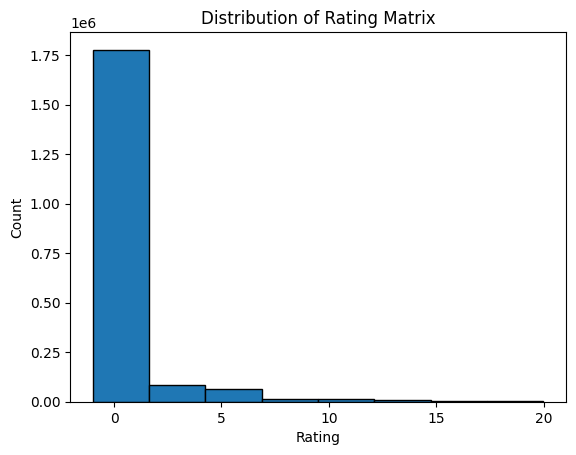

In [11]:
import matplotlib.pyplot as plt
plt.hist(ratings, bins=8, ec='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating Matrix')
plt.show()

We can see that majority of the rating matrix is between -0.25 to 0.2.

**Splitting the dataset**

Next, We split the dataset into training and test sets:

In [27]:
from scipy import sparse
from lightfm import LightFM
df_sparse = sparse.csr_matrix(df)
from lightfm.cross_validation import random_train_test_split
train_sparse, test_sparse = random_train_test_split(df_sparse, test_percentage=0.4, random_state=None)

In [ ]:
pd.options.display.max_rows = 5

In [28]:
train_sparse
test_sparse

<338x5825 sparse matrix of type '<class 'numpy.float64'>'
	with 787540 stored elements in COOrdinate format>

**Model** **Implementation**

In [14]:
from lightfm import LightFM
def create_model():

  model = LightFM(loss='warp')
  return model


In [15]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.12.0
Running on TPU  ['10.94.71.162:8470']


**Training** **The** **Model**

In [16]:
from lightfm import LightFM
with tpu_strategy.scope():

  model = create_model()
model

In [29]:
model.fit(train_sparse, epochs=20, num_threads=2)

**Evaluation** **Measure**

In [32]:
from lightfm.evaluation import auc_score
print("Test auc: %.2f" % auc_score(model, test_sparse).mean())

Test auc: 0.40


**Making** **Prediction**

We can now use the model to make prediction of a score that a user might give to certain items:

In [33]:

model.predict(user_ids=[4,8], item_ids=[2,5])


array([-25.939266, -26.304434], dtype=float32)

This means that user 4 might give a score of -25.93 to item 2. And user 8 might give a score of -26.3 to item 5